In [94]:
#Import necessarry libraries

#For data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import missingno as msno
from collections import Counter
from sklearn.preprocessing import LabelEncoder

#Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [95]:
#Load dataset
df = pd.read_csv(r"/Users/williamsibeh/Downloads/Customer-Churn.csv")

In [96]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Dictionary and the columns/Features meaning

#### DATA DICTIONARY


1. CustomerID: A unique identifier assigned to each telecom customer, enabling tracking and identification of individual customers.
2. Gender: The gender of the customer, which can be categorized as male, or female. This information helps in analyzing gender-based trends in customer churn.

3. SeniorCitizen: A binary indicator that identifies whether the customer is a senior citizen or not. This attribute helps in understanding if there are any specific churn patterns among senior customers.

4. Partner: Indicates whether the customer has a partner or not. This attribute helps in evaluating the impact of having a partner on churn behavior.
5. Dependents: Indicates whether the customer has dependents or not. This attribute helps in assessing the influence of having dependents on customer churn.

6. Tenure: The duration for which the customer has been subscribed to the telecom service. It represents the loyalty or longevity of the customer’s relationship with the company and is a significant predictor of churn.

7. PhoneService: Indicates whether the customer has a phone service or not. This attribute helps in understanding the impact of phone service on churn.

8. MultipleLines: Indicates whether the customer has multiple lines or not. This attribute helps in analyzing the effect of having multiple lines on customer churn.

9. InternetService: Indicates the type of internet service subscribed by the customer, such as DSL, fiber optic, or no internet service. It helps in evaluating the relationship between internet service and churn.

10. OnlineSecurity: Indicates whether the customer has online security services or not. This attribute helps in analyzing the impact of online security on customer churn.

11. OnlineBackup: Indicates whether the customer has online backup services or not. This attribute helps in evaluating the impact of online backup on churn behavior.

12. DeviceProtection: Indicates whether the customer has device protection services or not. This attribute helps in understanding the influence of device protection on churn.

13. TechSupport: Indicates whether the customer has technical support services or not. This attribute helps in assessing the impact of tech support on churn behavior.

14. StreamingTV: Indicates whether the customer has streaming TV services or not. This attribute helps in evaluating the impact of streaming TV on customer churn.

15. StreamingMovies: Indicates whether the customer has streaming movie services or not. This attribute helps in understanding the influence of streaming movies on churn behavior.

16. Contract: Indicates the type of contract the customer has, such as a month-to-month, one-year, or two-year contract. It is a crucial factor in predicting churn as different contract lengths may have varying impacts on customer loyalty.

17. PaperlessBilling: Indicates whether the customer has opted for paperless billing or not. This attribute helps in analyzing the effect of paperless billing on customer churn.

18. PaymentMethod: Indicates the method of payment used by the customer, such as electronic checks, mailed checks, bank transfers, or credit cards. This attribute helps in evaluating the impact of payment methods on churn.

19. MonthlyCharges: The amount charged to the customer on a monthly basis. It helps in understanding the relationship between monthly charges and churn behavior.

20. TotalCharges: The total amount charged to the customer over the entire tenure. It represents the cumulative revenue generated from the customer and may have an impact on churn.

21. Churn: The target variable indicates whether the customer has churned (canceled the service) or not. It is the main variable to predict in telecom customer churn analysis.

### Data Cleaning

In [97]:
#inspect the features
df.columns



Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [98]:
#Number of rows and columns in the dataset
df.shape

(7043, 21)

In [99]:
df.size

147903

In [100]:
#data Verification- Data type, number of features and rows, missing data etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note:
investigate column 'total charges', is a number but is shown as object on my dataframe

In [101]:
col_type =df['TotalCharges'].dtype
col_type

dtype('O')

In [102]:
# Convert the 'TotalCharges' column to numeric, coercing errors to Nan
column_name = 'TotalCharges'
df[column_name] = pd.to_numeric(df['TotalCharges'], errors='coerce')


# Identify rows where the 'TotalCharges' column has non-numeric values
non_numeric_rows = df[df[column_name].isna()]

# Display the rows where the 'TotalCharges' column has non-numeric values
print(f"Rows with non-numeric values in '{column_name}':")
print(non_numeric_rows)

Rows with non-numeric values in 'TotalCharges':
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone se

In [103]:
df[df['TotalCharges'].isna()]


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [104]:
df['TotalCharges'].median()



1397.475

In [105]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

NOTE:
i have identified that the column 'Total Charges have mising values, non numeric values which is the reason why the column was represented as (O)object instead of an Int or Float, so i will have check if there is an outliers in the column, i will either drop the column or replace the missing values with the median value

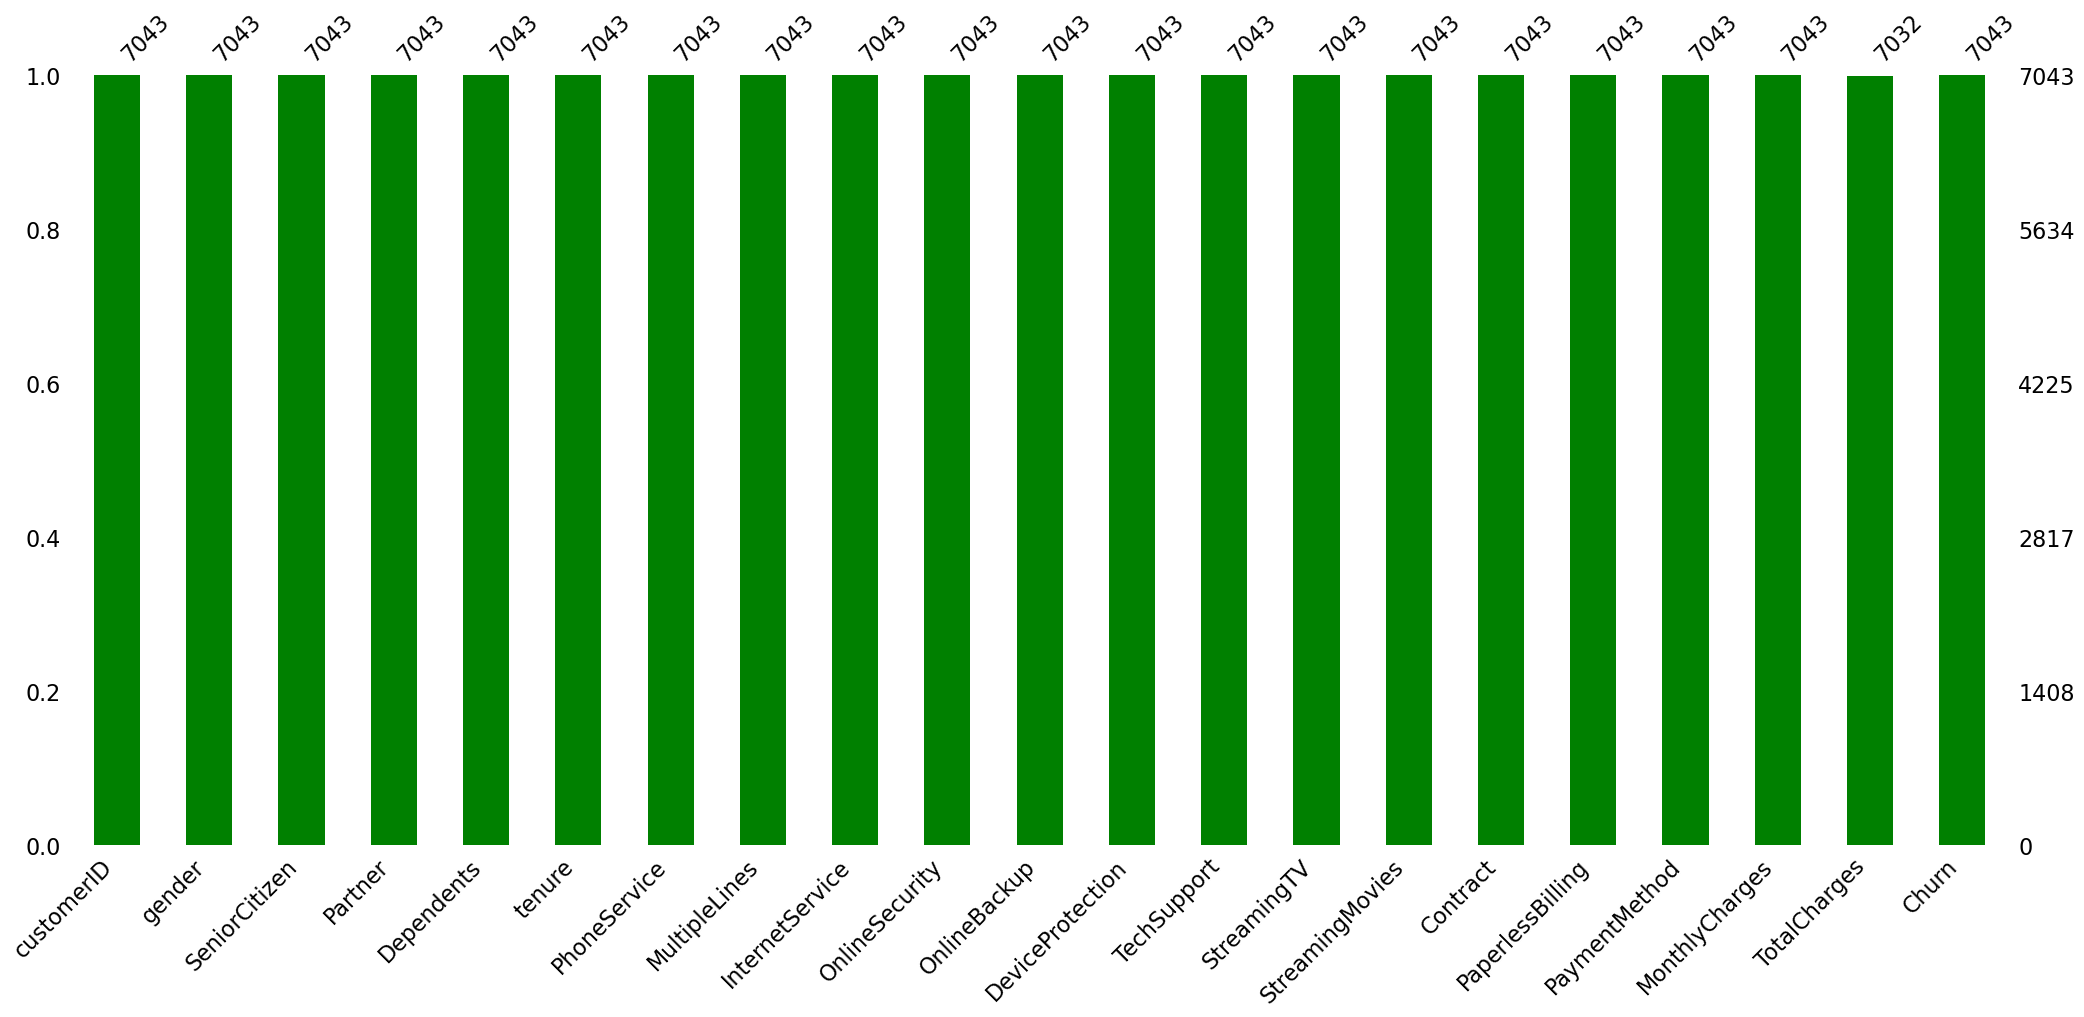

In [106]:
#visualize missing nan
msno.bar(df, color="green");

In [107]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


NOTE:
Totalcharges column have now been updated as a float(decimal point number), but i have some missing values on the column, which initially caused it to be displayed as object, i will have to deal with the missing rows

In [108]:
# drop the missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [109]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Note:
i have successfully dropped the rows of  the missing value in my dataset, 11 rows will not have any effect on my dataset so i have to drop the affected rows; i no longer have any missing rows on my dataset


In [110]:
#check for duplicate values
df[df.duplicated]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [111]:
#uniqe values in each column/feature
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

In [112]:
# Numerical statistical analysis of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Note:
there is a problem on my column "senior citizen", its not supposed to be a numerical column, rather should be a boolean, so from my statistical analysis i was able to figure that out, the variables are binary(0&1)
Total charges column- there is an outlier, the median value differs from the mean or average, the column will be scaled for my machine learning 


In [113]:
#categorical statistical analysis
df.describe(include=["object", "bool"])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


Note:
Customer ID column is not needed for my exploratory data analysis and my machine learning, i will have to drop the column

In [114]:
# Drop redundant column in dataset 

df.drop("customerID", axis=1, inplace=True)

In [115]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EXPLORATORY DATA ANALYSIS

Univariate Analysis

In [116]:
#Categorical features/ Columns
cat_col = df.select_dtypes('object').columns.to_list()
cat_col

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [117]:
#numerical features
num_col = df.select_dtypes(np.number).columns.to_list()
num_col

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

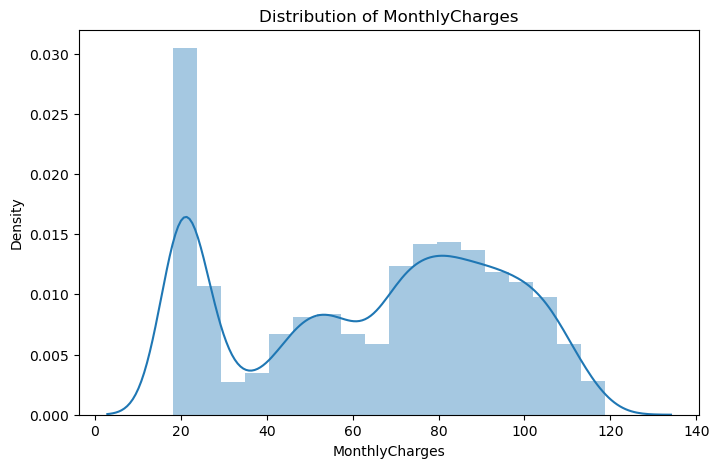

In [118]:
#Distribhutrion of MonthlyCharges
plt.figure(figsize =(8,5))

sns.distplot(df['MonthlyCharges'])

plt.title('Distribution of MonthlyCharges')
plt.show()

NOTE: the 'monthlycharges' column is right skewed i.e positive skewness, The right tail of the distribution is longer or farther than the left tail. The mass of the distribution is concentrated on the left side, and there are a few large values pulling the mean to the right.




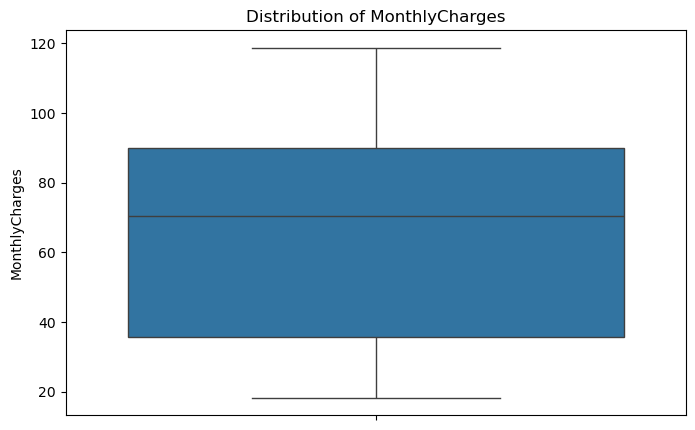

In [119]:
#CHECKING for outliers on MonthlyCharges
plt.figure(figsize =(8,5))

sns.boxplot(df['MonthlyCharges'])

plt.title('Distribution of MonthlyCharges')
plt.show()

NOTE: There is no outliers on monthlycharges

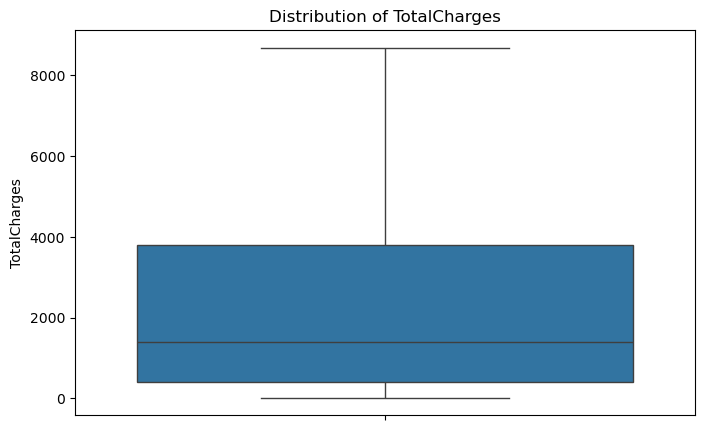

In [120]:
#CHECKING for outliers on totalcharges
plt.figure(figsize =(8,5))

sns.boxplot(df['TotalCharges'])

plt.title('Distribution of TotalCharges')
plt.show()

There is no outlier on the TotalCharges column, but also the max value is far from the mean or median value

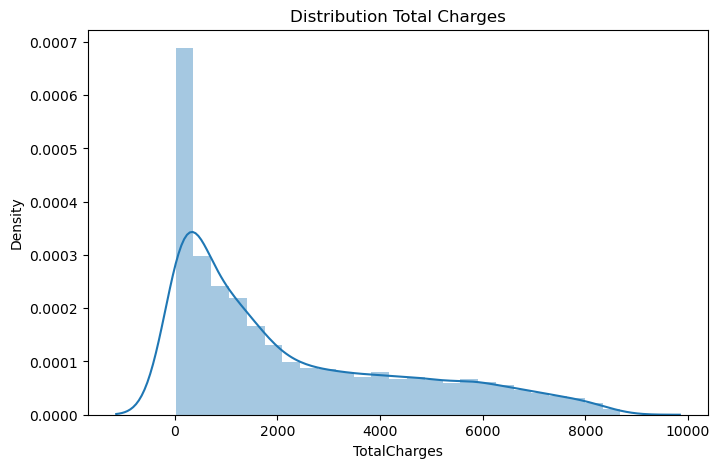

In [121]:
#Distribhutrion of Total Charges
plt.figure(figsize =(8,5))

sns.distplot(df['TotalCharges'])

plt.title('Distribution Total Charges')
plt.show()

There is a positive skewness in Totaal charges by customers

Text(0.5, 1.0, 'customer churn years')

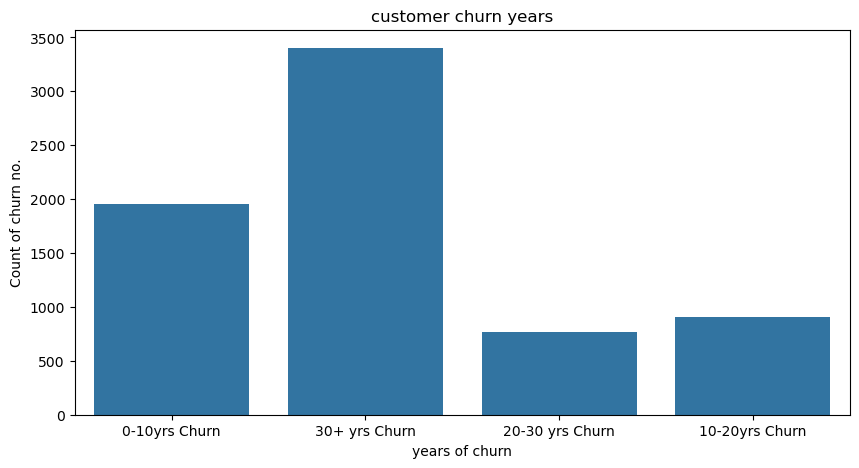

In [122]:
# GROUPIN TENURE TO DIFF CATEGORIES
#DATA VISUALIZATION

def CHURN_AGE(tenure):
    if tenure<= 10:
        return "0-10yrs Churn"
    elif tenure <=20:
        return "10-20yrs Churn"
    elif tenure <=30:
        return "20-30 yrs Churn"
    else:
        return "30+ yrs Churn"
    
df['CHURN_AGE']= df['tenure'].apply(CHURN_AGE)

#investigating the years of churn
plt.figure(figsize=(10,5))
sns.countplot(x='CHURN_AGE', data=df)
plt.xlabel('years of churn')
plt.ylabel('Count of churn no.')
plt.title('customer churn years')

Observations:
there is more customers in the tenure 30+ years or duration than any other duration, followed by Customer between the range of  0-10, 
will do further analysis to know the kind of customers that fall in this range if they're junior or senior customers, and there gender

### Categorical features univariate analysis visualization





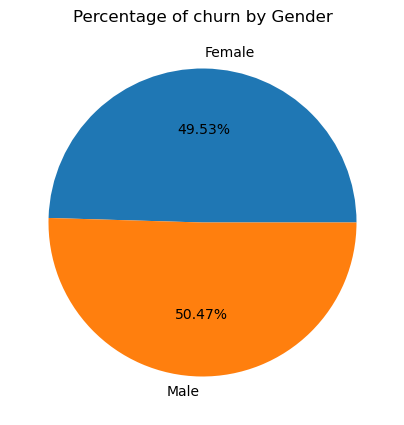

In [126]:
#total churn by customer gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["gender"])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of churn by Gender")
plt.show();


In [127]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

NOTE:
The percentage of male and female customers are 50.47% male and 49.53% female
    

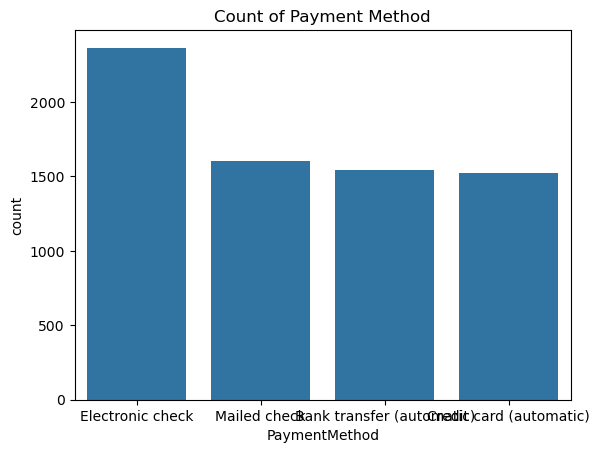

<Figure size 1000x800 with 0 Axes>

In [32]:
#COUNT OF PAYMENT METHOD
plt.title('Count of Payment Method')
sns.countplot(x= "PaymentMethod", data = df)
plt.figure(figsize = (10, 8));


In [125]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Eletronic Check is the most used payment(2365) method by customers, others  do not have any significant  Difference 

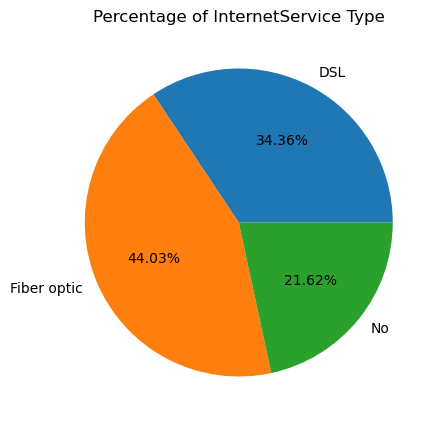

In [33]:
#Percentage of  InternetService type

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["InternetService"])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of InternetService Type")
plt.show();


In [124]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

Fiber optic is the most used internetservice (3096) which is 44.03% of customers, 34% of customers use DSL, while 21% of customers does not use internetservice

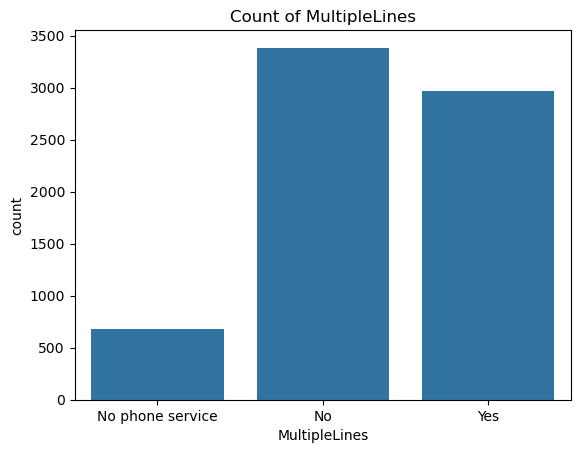

<Figure size 1000x500 with 0 Axes>

In [34]:
plt.title('Count of MultipleLines')
sns.countplot(x= "MultipleLines", data = df)
plt.figure(figsize = (10, 5));


In [ ]:
df['MultipleLines'].value_counts()

3385 of customers  does not have multiple lines, 2967 customers  has multiple lines , while 680 customer Doesn’t  have phone service

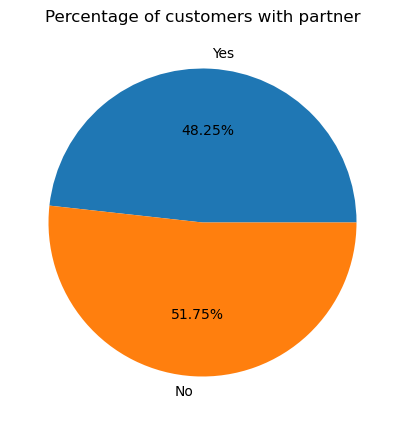

In [35]:
#Percentage of Customers with Partner

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df["Partner"])
ax.pie(count.values(),labels=count.keys(),autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of customers with partner")
plt.show();

In [ ]:
df['Partner'].value_counts()

48.25 percent of customers(3639) have partners, while 51.75 percent of customers are single(3393)


Text(0.5, 1.0, 'Total No of Citizens')

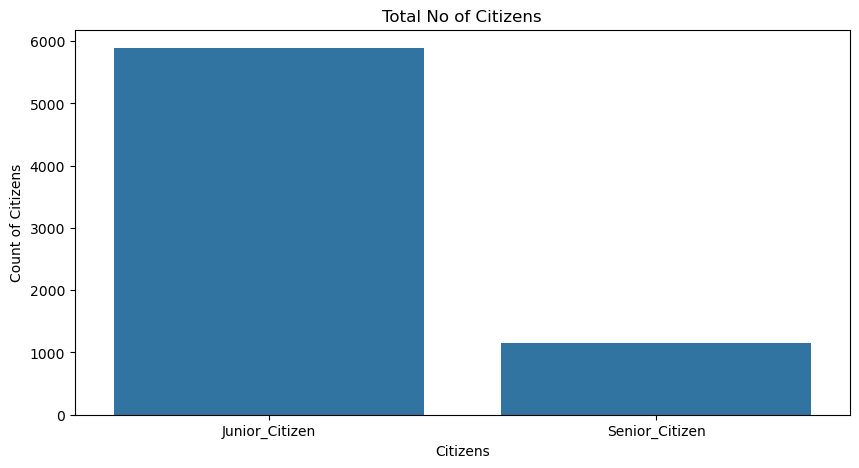

In [36]:
# Data visualizaito for SeniorCitizen

def SenC(SeniorCitizen):
    if SeniorCitizen == 1:
        return 'Senior_Citizen'
    else:
        return 'Junior_Citizen'
    
# create the new column for SeniorCitizen
df['SenC']=df['SeniorCitizen'].apply(SenC) 

plt.figure(figsize = (10,5))
sns.countplot(x='SenC', data=df)
plt.xlabel('Citizens')
plt.ylabel('Count of Citizens')
plt.title('Total No of Citizens')

In [37]:
df["SeniorCitizen"].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

Majority of the customers are Junior citizens, while the rest are senior citizens

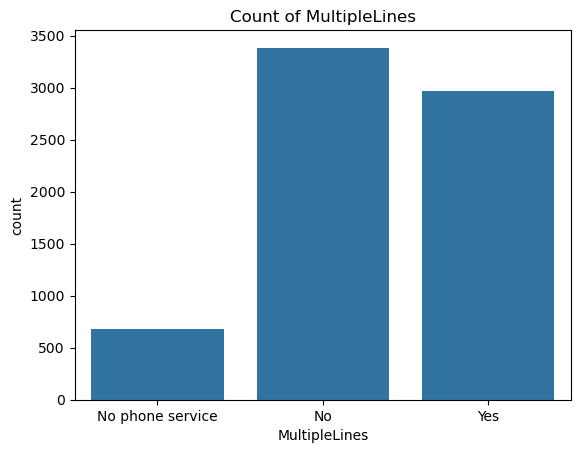

<Figure size 1000x500 with 0 Axes>

In [38]:
plt.title('Count of MultipleLines')
sns.countplot(x= "MultipleLines", data = df)
plt.figure(figsize = (10, 5));


In [39]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

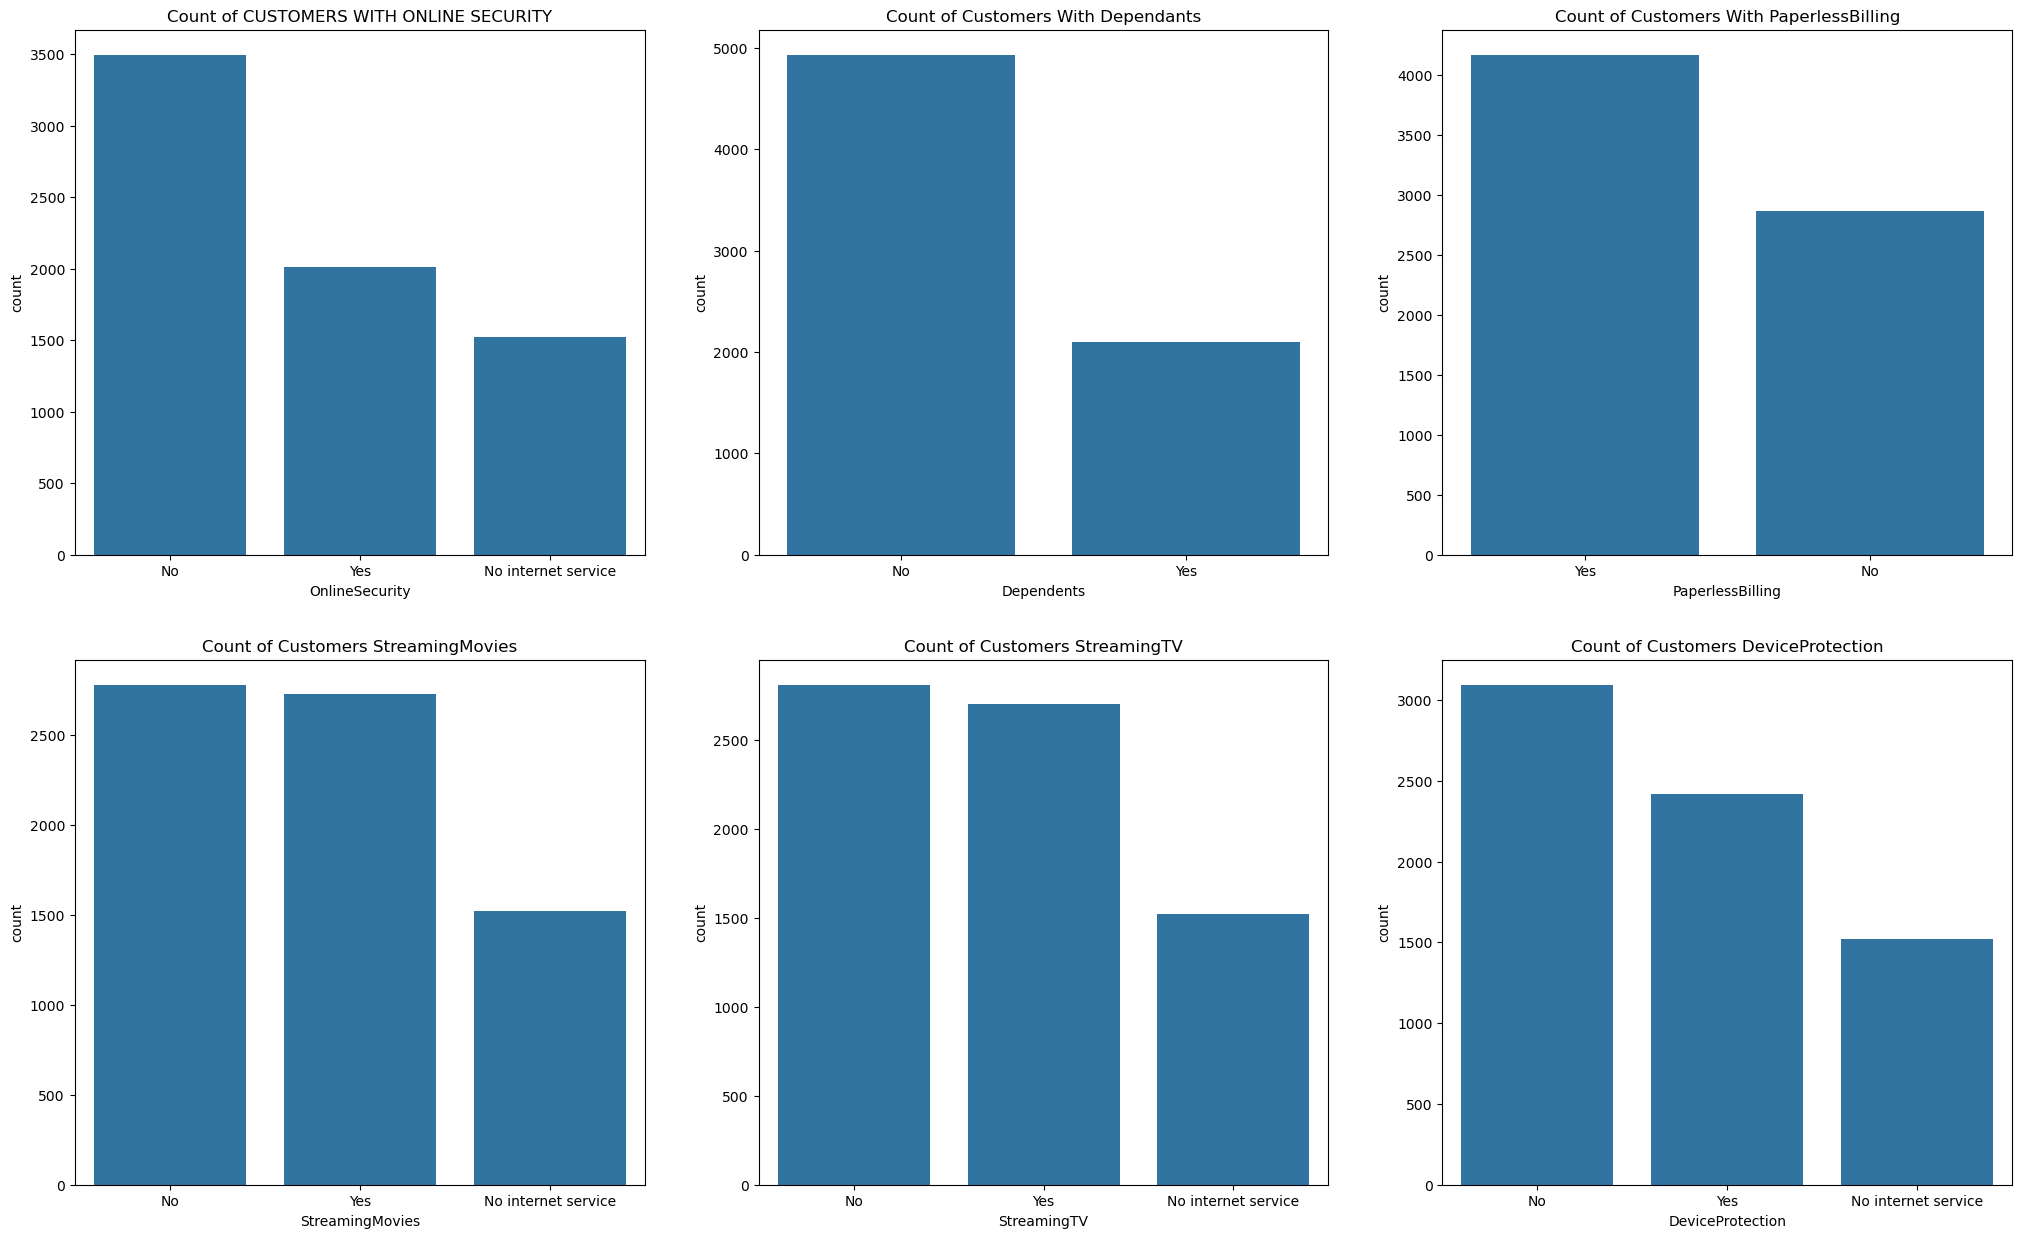

In [40]:
fig,axs = plt.subplots(nrows=2, ncols=3, figsize =(25,15))
sns.countplot(x="OnlineSecurity", data= df,  ax=axs[0,0])
axs[0,0].set_title("Count of CUSTOMERS WITH ONLINE SECURITY")


sns.countplot(x="Dependents", data= df,  ax=axs[0,1])
axs[0,1].set_title("Count of Customers With Dependants")


sns.countplot(x="PaperlessBilling", data= df,  ax=axs[0,2])
axs[0,2].set_title("Count of Customers With PaperlessBilling")


sns.countplot(x="StreamingMovies", data= df,  ax=axs[1,0])
axs[1,0].set_title("Count of Customers StreamingMovies")


sns.countplot(x="StreamingTV", data= df,  ax=axs[1,1])
axs[1,1].set_title("Count of Customers StreamingTV")

sns.countplot(x="DeviceProtection", data= df,  ax=axs[1,2])
axs[1,2].set_title("Count of Customers DeviceProtection");

Text(0.5, 1.0, 'Total number of Churn Customers')

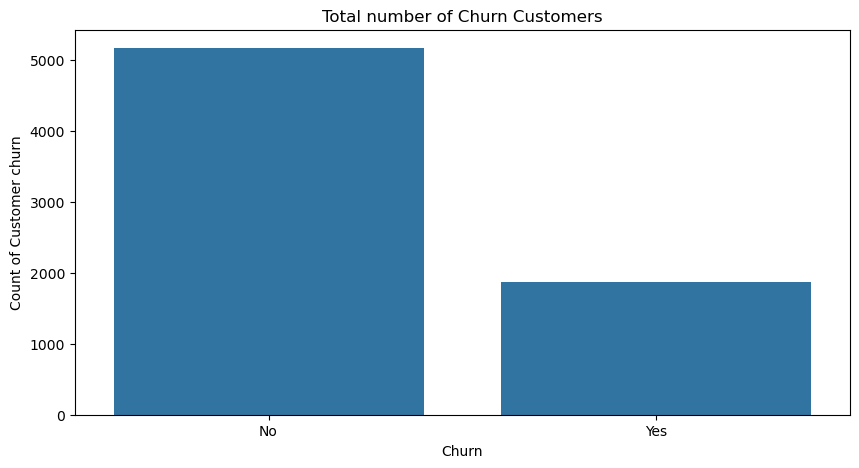

In [41]:
# Data visualization  for customer churn

plt.figure(figsize = (10,5))
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn')
plt.ylabel('Count of Customer churn')
plt.title('Total number of Churn Customers')


In [42]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

the total number of customers churn is less than the loyal customers, majority of the customers do not churn(5163) while customers that churn are (1869)

### Bivariate Analysis

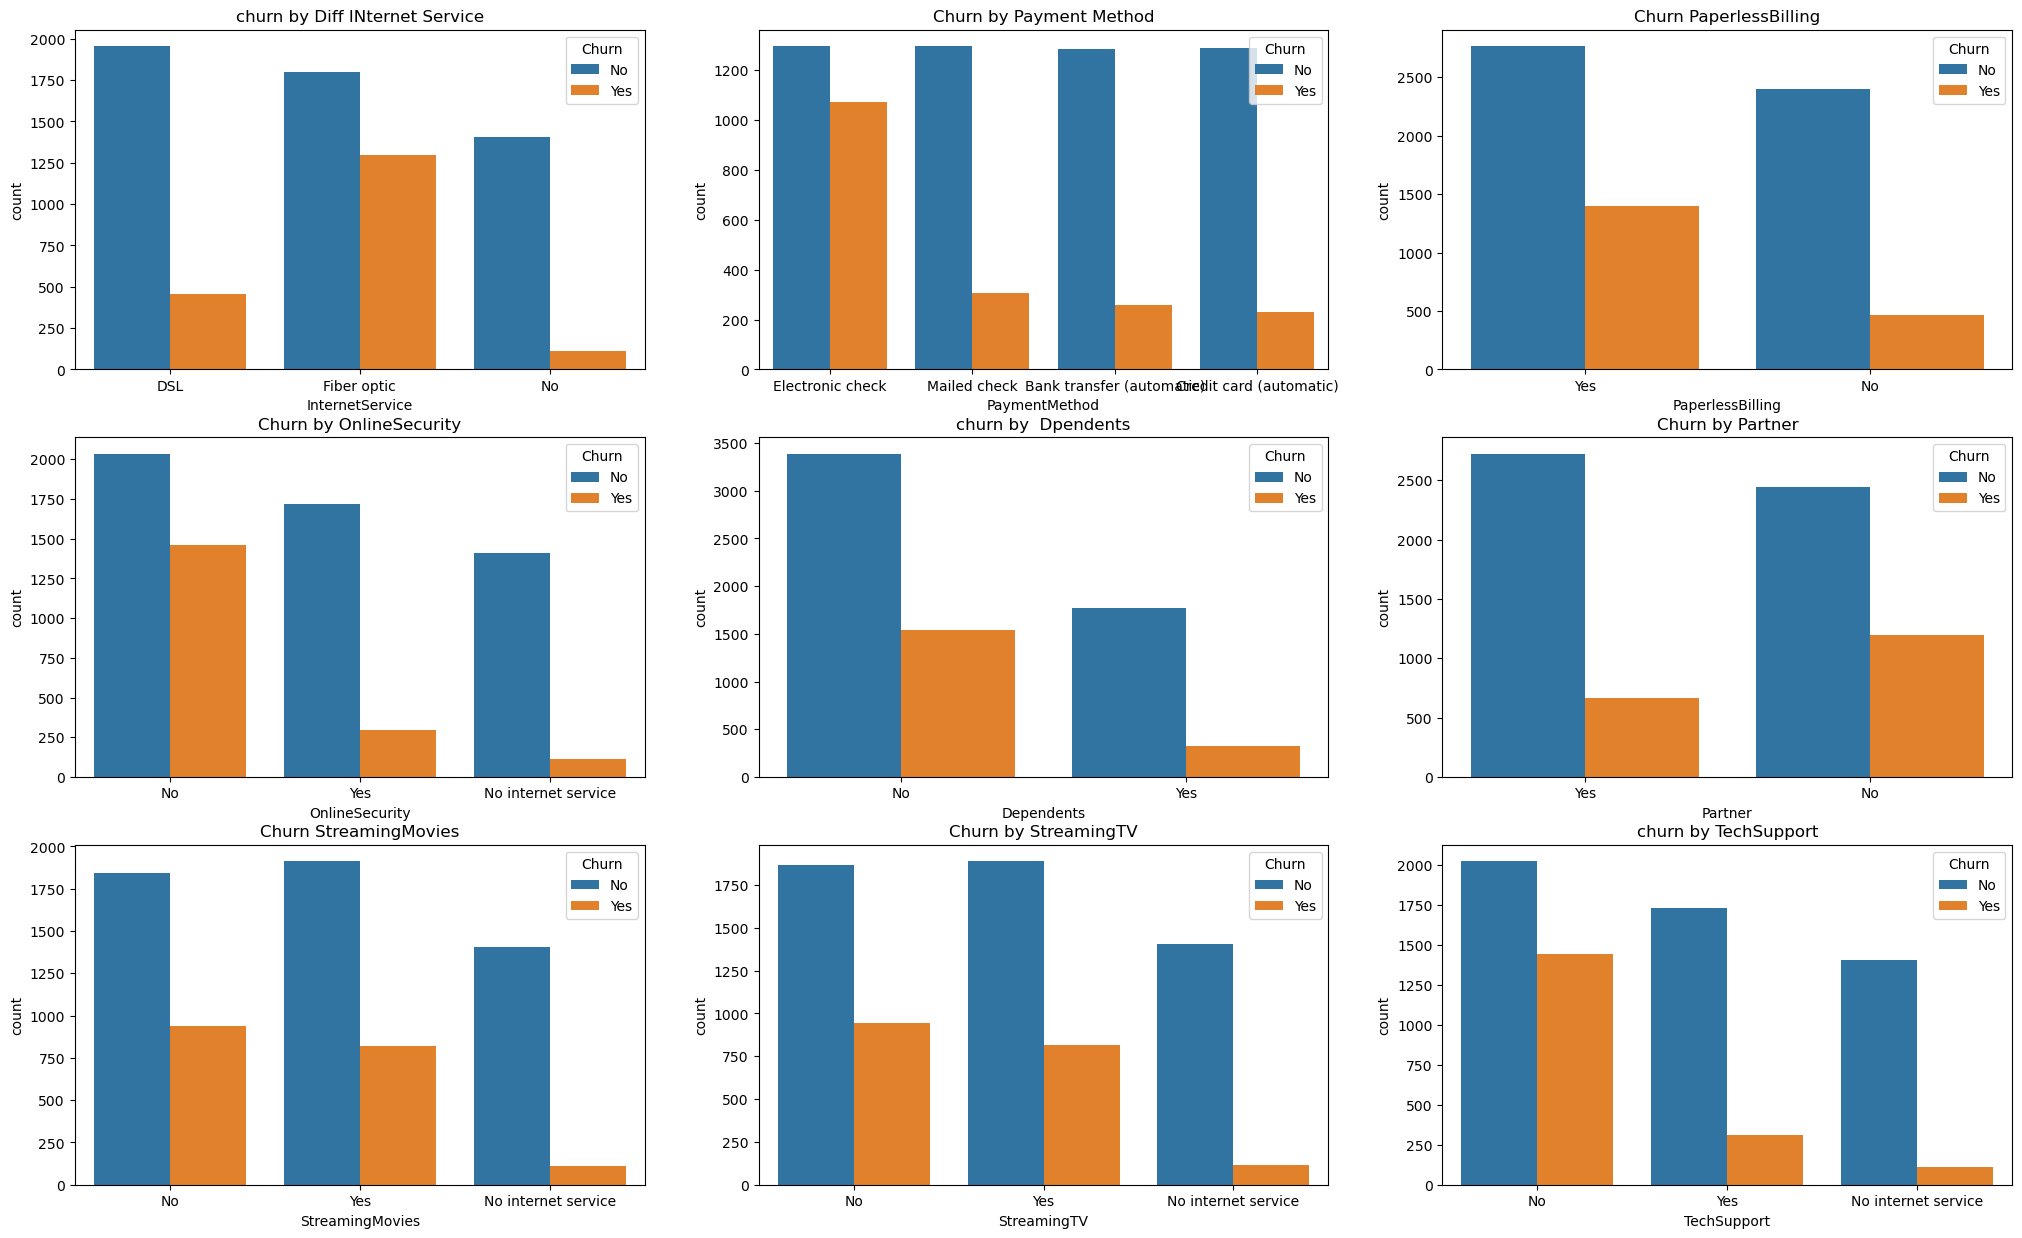

In [43]:
fig,axs = plt.subplots(nrows=3, ncols=3, figsize =(25,15))
sns.countplot(x="InternetService", data= df, hue = "Churn", ax=axs[0,0])
axs[0,0].set_title("churn by Diff INternet Service")

sns.countplot(x="PaymentMethod", data= df, hue = "Churn", ax=axs[0,1])
axs[0,1].set_title("Churn by Payment Method")

sns.countplot(x="PaperlessBilling", data= df, hue = "Churn", ax=axs[0,2])
axs[0,2].set_title("Churn PaperlessBilling")

sns.countplot(x="OnlineSecurity", data= df, hue = "Churn", ax=axs[1,0])
axs[1,0].set_title("Churn by OnlineSecurity")

sns.countplot(x="Dependents", data= df, hue = "Churn", ax=axs[1,1])
axs[1,1].set_title("churn by  Dpendents")

sns.countplot(x="Partner", data= df, hue = "Churn", ax=axs[1,2])
axs[1,2].set_title("Churn by Partner")

sns.countplot(x="StreamingMovies", data= df, hue = "Churn", ax=axs[2,0])
axs[2,0].set_title("Churn StreamingMovies")

sns.countplot(x="StreamingTV", data= df, hue = "Churn", ax=axs[2,1])
axs[2,1].set_title("Churn by StreamingTV")

sns.countplot(x="TechSupport", data= df, hue = "Churn", ax=axs[2,2])
axs[2,2].set_title("churn by TechSupport");


1) Churn by different internet service- Customers using DSL have large number of customers that do not churn, and few that churn, Fiberoptic have customers that churn slightly different those that did not, and customers with no internet are most loyal customers having few churn Customers
2) Churn by Payment method- Elerctronic Check have the highest number of churn customers,the number of loyal customers are the same among the 4 payment options, customers that use bank transfer and Debit card have less churn
3) Churn by online Security- Customers without  online security have the highest  number of loyal customers, also the highest number of churn customers, Customers with onlines security are loyal, and have few of them that churn, which means, online security is very vital for customer loyalty, customers with no internet service are also loyal, having few of the customers that churn
4) Cutomers with No dependents, majority of customers without dependents are loyal, about half of 1/4 customers with no dependents churn, whereas  we almost same number of customers with dependents being loyal, and few customers with dependendts not being loyal
5) Churn by Partner- customers with partners are loyal, having few of them who churn, also almost same number of single customers are loyal, but having up to (1000) customers who are single churn
6) Streaming Movies churn - 1750 customers who do not stream movies are loyal, 1000 churn, about 1800 customer who stream movies are loyal, while 800 churn, 1300 customers with no internet service are loyal, while less than 100 customers with no internet service churn
7) Tech support churn- 2000 customers with no tech support are loyal, about 1300 with no tech support churn, about 1750 customers with tech support are loyal, while  few, about 250, churn which means lot of customers with tech support are likely to be loyal, customers with no internet service, about 1300 are loyal, whereas few of them about less than 100 churn
8) paperless billing- about 3000 customers with   paperless billing are loyal, about 1200 churn, 2300 without paperless billing are loyal, less than 500 churn


In [44]:
#count of internetservice by churn
df.groupby(['InternetService','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113


In [45]:
#count of PaymentMethod by churn
df.groupby(['PaymentMethod','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1284,258
Credit card (automatic),1289,232
Electronic check,1294,1071
Mailed check,1296,308


In [46]:
#count of PaperlessBilling by churn
df.groupby(['PaperlessBilling','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
PaperlessBilling,,
No,2395,469
Yes,2768,1400


In [47]:
#count of OnlineSecurity by churn
df.groupby(['OnlineSecurity','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


In [48]:
#count of Dependents by churn
df.groupby(['Dependents','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1773,326


In [49]:
#count of Partner by churn
df.groupby(['Partner','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
Partner,,
No,2439,1200
Yes,2724,669


In [50]:
#count of StreamingMovies by churn
df.groupby(['StreamingMovies','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
StreamingMovies,,
No,1843,938
No internet service,1407,113
Yes,1913,818


In [51]:
#count of Streaming tv by churn
df.groupby(['StreamingTV','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
StreamingTV,,
No,1867,942
No internet service,1407,113
Yes,1889,814


In [52]:
#count of tech support by churn
df.groupby(['TechSupport','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


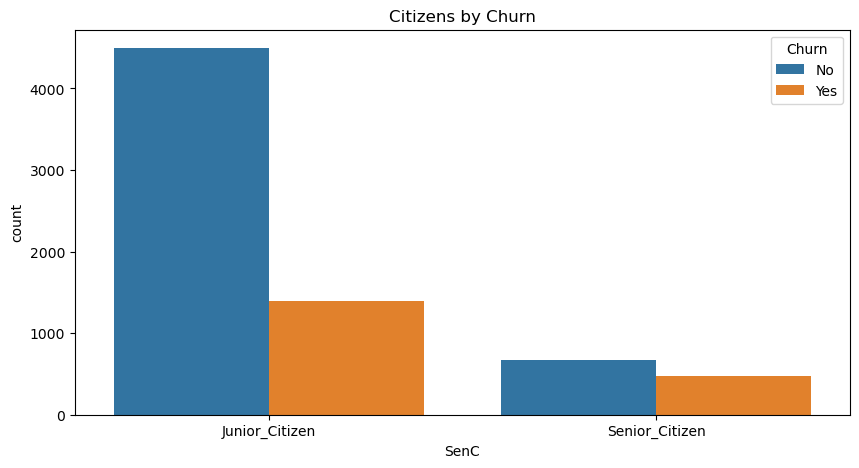

In [53]:
#churn by Citizens
plt.figure(figsize = (10,5))
sns.countplot(x="SenC", data= df, hue = "Churn",)
plt.title( 'Citizens by Churn');


In [54]:
#count of Citizens by churn
df.groupby(['SeniorCitizen','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


NOTE:
The majority  of customers are junior citizen , having a count of 4497 customers who are loyal, and few churn 1393 customers, while our senior customers are few, having  666 loyal customers and 476 customers churn

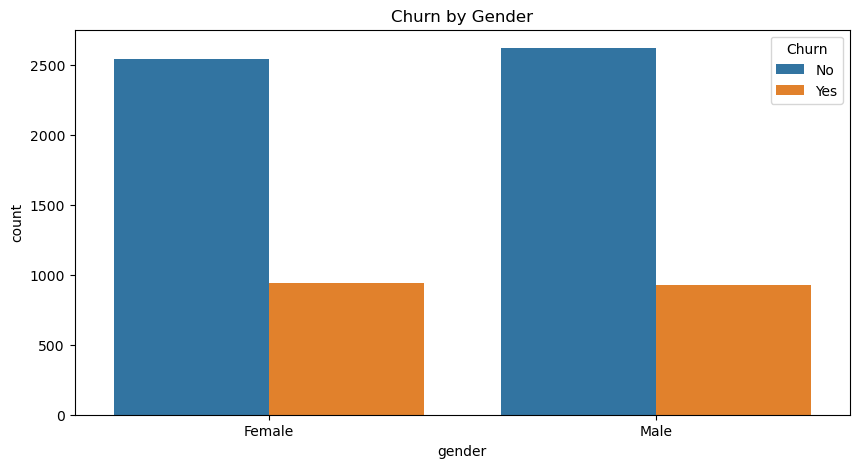

In [55]:
#churn by gender
plt.figure(figsize = (10,5))
sns.countplot(x="gender", data= df, hue = "Churn",)
plt.title( 'Churn by Gender');


In [56]:
#count of gender by churn
df.groupby(['gender','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


Female customers have total of 2544 loyal customers, and 939 churn customers, while male customers have total 2619  loyal customers and 930 churn customers 

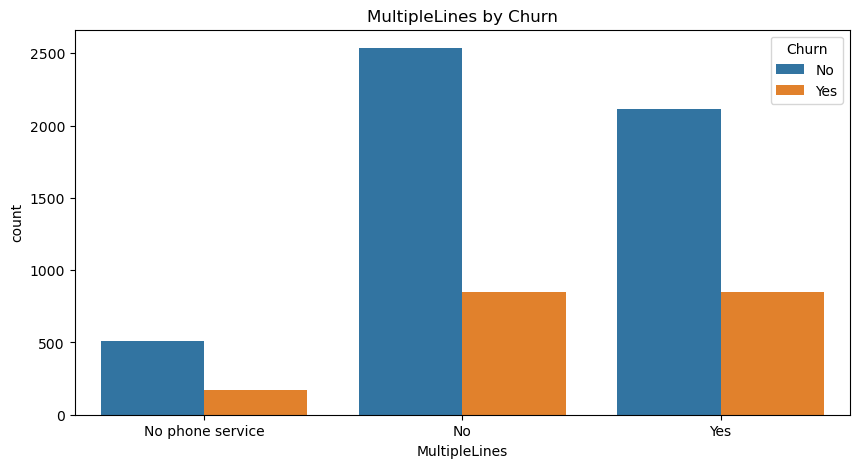

In [57]:
#churn by multiplielines
plt.figure(figsize = (10,5))
sns.countplot(x="MultipleLines", data= df, hue = "Churn",)
plt.title( 'MultipleLines by Churn');


In [58]:
#count of multiple lines by churn
df.groupby(['MultipleLines','Churn']).size().unstack(fill_value=0)

Churn,No,Yes
MultipleLines,,
No,2536,849
No phone service,510,170
Yes,2117,850


Customers with no multiple line have 2536 loyal customers, 849 churn customers, while those with multiple lines have 2117 loyal customers, and 850 churn customers, those with no phone service have 510 loyal and 170 churn

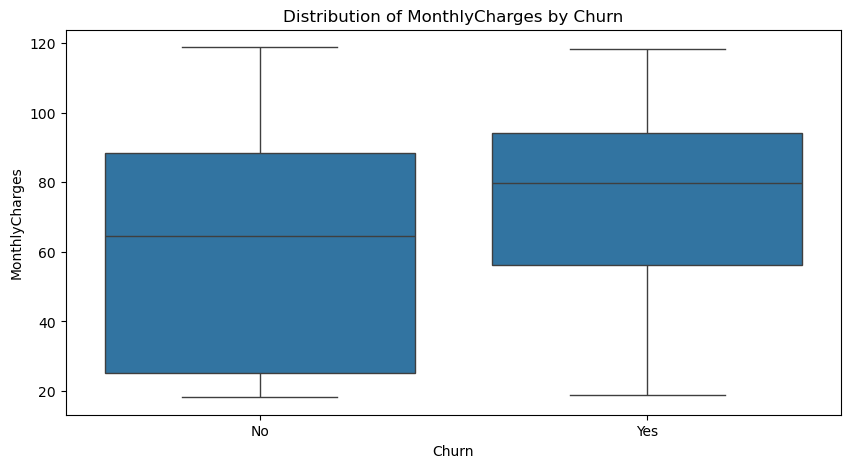

In [59]:
#Numerical bivariate analysis
# Investigating the customers MonthlyCharges by the Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('Distribution of MonthlyCharges by Churn')
plt.show()

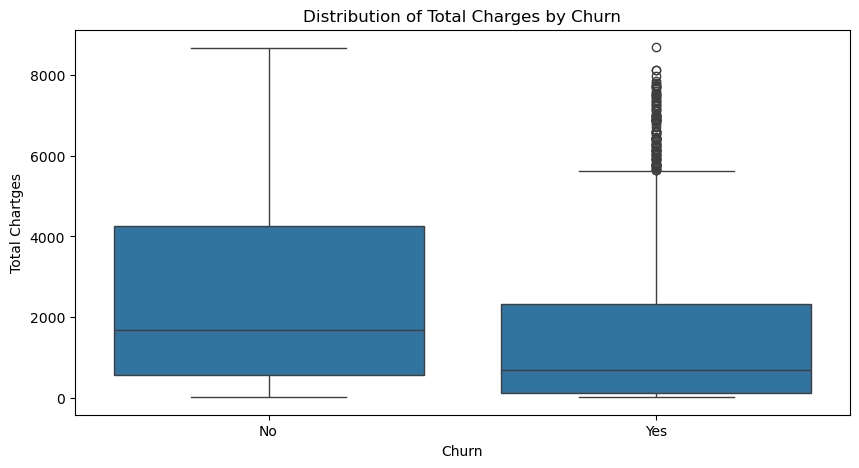

In [60]:
# Investigating the customers TotalChaerges by the Churn
plt.figure(figsize=(10, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.xlabel('Churn')
plt.ylabel('Total Chartges')
plt.title('Distribution of Total Charges by Churn')
plt.show()

there is outliers on Total chargers on customers that churn, the dataset have to be scaled for machine learnine 

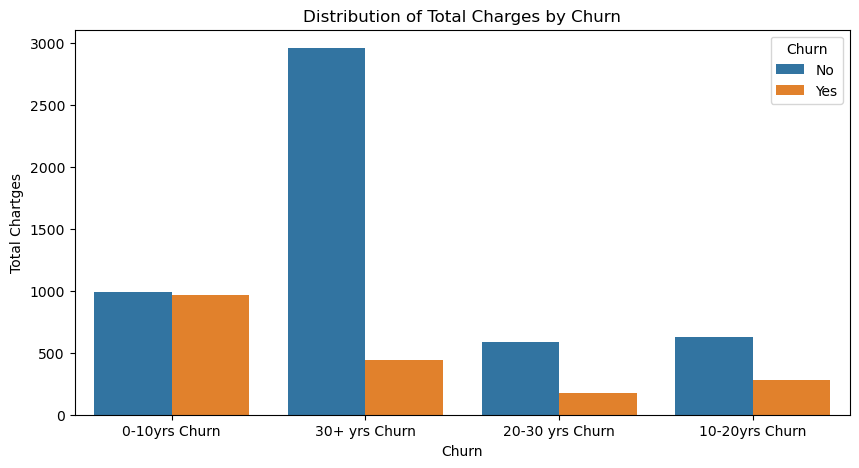

In [61]:
# Investigating the customers Tenure by the Churn
plt.figure(figsize=(10, 5))
sns.countplot( x='CHURN_AGE', data=df, hue = 'Churn')
plt.xlabel('Churn')
plt.ylabel('Total Chartges')
plt.title('Distribution of Total Charges by Churn')
plt.show()

The most loyal customers are under tenure 30+ years while customers between the tenure 20-30 years have the least loyal customers

### Multivariare Analysis

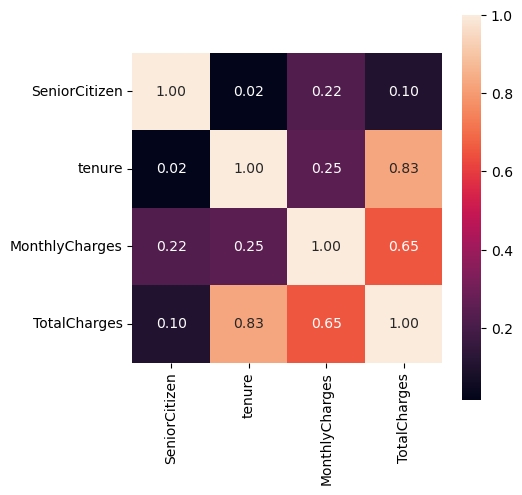

In [62]:
#correlation between variables
plt.figure(figsize=(5,5))

hm = sns.heatmap(df.corr(),annot=True, cbar=True, square=True, fmt='.2f', annot_kws={'size': 10})


In [63]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


### CORRELATION


1) Senior citizens vs monthly charges = 0.21 weak psitive relationship
2) Senior citizens vs Total Charges = 0.1 weak positive relationship
3) total charges vs monthly charges = 0.65  positive  relationship 
4) total charges vs tenure = 0.82  strong positive relationship
5) Senior citizens vs tenure = 0.01 no relationship
6) mothly charges vs tenure = 0.24 weak positive relationship




## Feature Engeering/ Data Pre-Processing

In [64]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,CHURN_AGE,SenC
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-10yrs Churn,Junior_Citizen
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,30+ yrs Churn,Junior_Citizen
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-10yrs Churn,Junior_Citizen
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,30+ yrs Churn,Junior_Citizen
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-10yrs Churn,Junior_Citizen


In [65]:
#drop the  created labels
columns_to_drop = ["CHURN_AGE", "SenC"]
df.drop(columns=columns_to_drop, inplace=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


NOTE:
There is categorical features in the dataset, need to encode them for machine learning
    

#### Feature Encoding

In [67]:
#create a copy of the data, Exclude the Targety ie ChurnDeviceProtection
df1 = df[['gender', 'SeniorCitizen','Partner', 'Dependents', 'tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]

target = df[['Churn']]


In [68]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [69]:
target

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


###  NOTE:
##### i will have to encode the categorical features to Numerical for machine learning

In [70]:
# Label encoding for the target variable and the x variable


# Create a label encoder
lab_enc = LabelEncoder()

# Fit and transform the target variable
t_enc = lab_enc.fit_transform(target)

# Display the encoded values
t_enc

array([0, 0, 1, ..., 0, 1, 0])

In [71]:
# Encode the x variable
df11 = pd.get_dummies(df1)
df11

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [72]:
df11.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
gender_Female                                uint8
gender_Male                                  uint8
Partner_No                                   uint8
Partner_Yes                                  uint8
Dependents_No                                uint8
Dependents_Yes                               uint8
PhoneService_No                              uint8
PhoneService_Yes                             uint8
MultipleLines_No                             uint8
MultipleLines_No phone service               uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No                           uint8
OnlineSecurity_No                            uint8
OnlineSecurity_No internet serv

In [73]:
# Print column names
print(df.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [74]:
print(t_enc)

[0 0 1 ... 0 1 0]


In [75]:
df11

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [76]:
#Dealing with outliers
# mothlycharges, totalcharges
# NommaLize the data
scaler = MinMaxScaler()
df11["scale_m.charges"]=  scaler.fit_transform(df1['MonthlyCharges'].values.reshape (-1, 1))
df11["scale_T.charges"]= scaler.fit_transform(df1['TotalCharges'].values.reshape (-1, 1))

df11.drop (['MonthlyCharges', 'TotalCharges', ], axis=1, inplace=True)
df11.head()

,SeniorCitizen,tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,scale_m.charges,scale_T.charges
0,0,1,1,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0.115423,0.001275
1,0,34,0,1,1,0,1,0,0,1,...,1,0,1,0,0,0,0,1,0.385075,0.215867
2,0,2,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0.354229,0.010310
3,0,45,0,1,1,0,1,0,1,0,...,1,0,1,0,1,0,0,0,0.239303,0.210241
4,0,2,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,0.521891,0.015330


In [77]:
#Split the dataset into training and testing sets x-train= questions, y= ansers
x_train,  x_test, y_train, y_test = train_test_split(df11, t_enc, test_size=0.2,random_state=42)


In [78]:
#model Building

#logistic Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:",accuracy_score(y_test, ly_pred))
print("Precision:",precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:",f1_score(y_test, ly_pred))
print("AUC-ROC:",roc_auc_score(y_test, ly_pred))


Logistic Regression
Accuracy: 0.7903340440653873
Precision: 0.627831715210356
Recall: 0.5187165775401069
F1-score: 0.5680819912152268
AUC-ROC: 0.7036951716354939


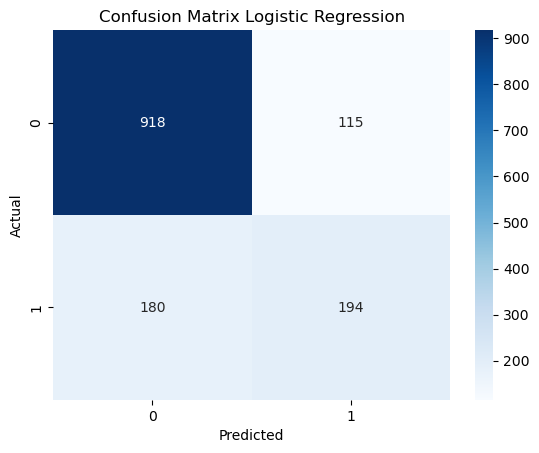

In [79]:
#create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Logistic Regression")
plt.show()

In [80]:
#model Building

#Random Foresrt Classifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("RandomForestClassifier")
print("Accuracy:",accuracy_score(y_test, rfy_pred))
print("Precision:",precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:",f1_score(y_test, rfy_pred))
print("AUC-ROC:",roc_auc_score(y_test, rfy_pred))

RandomForestClassifier
Accuracy: 0.7739872068230277
Precision: 0.5985915492957746
Recall: 0.45454545454545453
F1-score: 0.5167173252279635
AUC-ROC: 0.6720936372436856


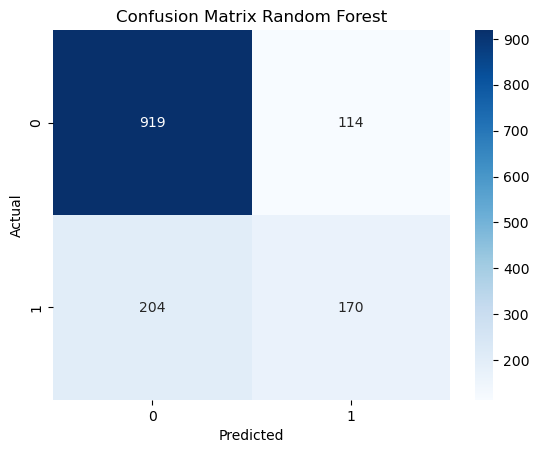

In [81]:
#create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

#visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()

In [82]:
#model Building

#XGB Classifier

XGBC = XGBClassifier()

XGBC.fit(x_train, y_train)

Xy_pred = XGBC.predict(x_test)

print("XGB Classifier")
print("Accuracy:",accuracy_score(y_test, Xy_pred))
print("Precision:",precision_score(y_test, Xy_pred))
print("Recall:", recall_score(y_test, Xy_pred))
print("F1-score:",f1_score(y_test, Xy_pred))
print("AUC-ROC:",roc_auc_score(y_test, Xy_pred))


XGB Classifier
Accuracy: 0.7654584221748401
Precision: 0.56875
Recall: 0.48663101604278075
F1-score: 0.5244956772334293
AUC-ROC: 0.6765197674599189


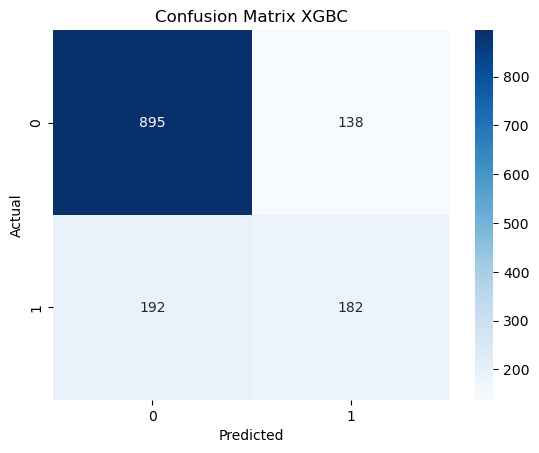

In [83]:

#create a confusion matrix
Xcm = confusion_matrix(y_test, Xy_pred)

#visualize the confusion matrix
sns.heatmap(Xcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix XGBC")
plt.show()

In [84]:
#model Building

#KNEIGBORS

KNC = KNeighborsClassifier()
KNC.fit(x_train, y_train)
KNY_pred = KNC.predict(x_test)
print("KNeighborsClassifier")
print("Accuracy:",accuracy_score(y_test, KNY_pred))
print("Precision:",precision_score(y_test, KNY_pred))
print("Recall:", recall_score(y_test, KNY_pred))
print("F1-score:",f1_score(y_test, KNY_pred))
print("AUC-ROC:",roc_auc_score(y_test, KNY_pred))

KNeighborsClassifier
Accuracy: 0.7626154939587776
Precision: 0.5571428571428572
Recall: 0.5213903743315508
F1-score: 0.5386740331491713
AUC-ROC: 0.6856709858104996


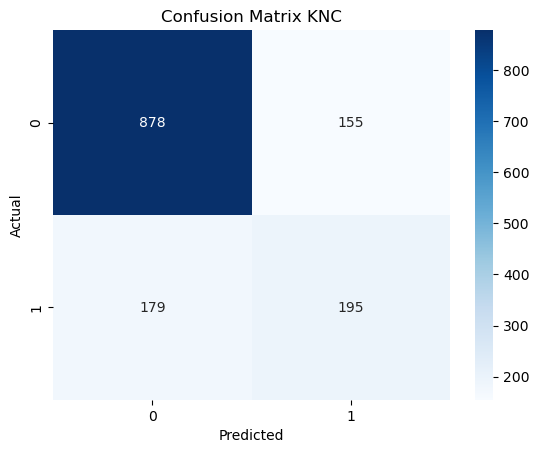

In [85]:
#create a confusion matrix
Kcm = confusion_matrix(y_test, KNY_pred)

#visualize the confusion matrix
sns.heatmap(Kcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNC")
plt.show()

In [86]:
#SGDClassifier

SGDC = SGDClassifier()
SGDC.fit(x_train, y_train)
SGY_pred = SGDC.predict(x_test)
print("SGDClassifier")
print("Accuracy:",accuracy_score(y_test, SGY_pred))
print("Precision:",precision_score(y_test, SGY_pred))
print("Recall:", recall_score(y_test, SGY_pred))
print("F1-score:",f1_score(y_test, SGY_pred))
print("AUC-ROC:",roc_auc_score(y_test,SGY_pred))

SGDClassifier
Accuracy: 0.7853589196872779
Precision: 0.6764705882352942
Recall: 0.3689839572192513
F1-score: 0.4775086505190312
AUC-ROC: 0.6525461896454436


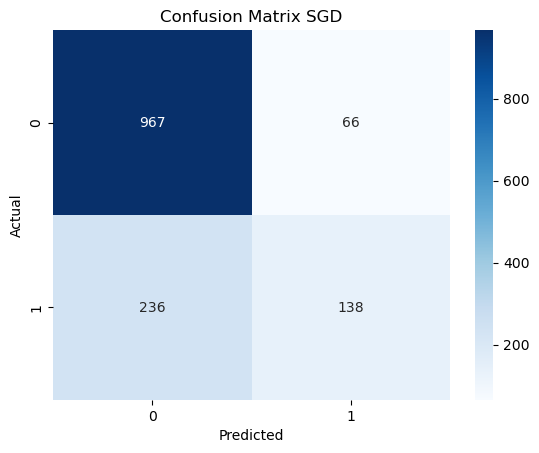

In [87]:
#create a confusion matrix
Scm = confusion_matrix(y_test, SGY_pred)

#visualize the confusion matrix
sns.heatmap(Scm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SGD")
plt.show()

In [88]:
#SVC

SC = SVC()
SC.fit(x_train, y_train)
SCY_pred = SC.predict(x_test)
print("SVC")
print("Accuracy:",accuracy_score(y_test, SCY_pred))
print("Precision:",precision_score(y_test, SCY_pred))
print("Recall:", recall_score(y_test, SCY_pred))
print("F1-score:",f1_score(y_test, SCY_pred))
print("AUC-ROC:",roc_auc_score(y_test,SCY_pred))

SVC
Accuracy: 0.7803837953091685
Precision: 0.6326530612244898
Recall: 0.4144385026737968
F1-score: 0.5008077544426494
AUC-ROC: 0.6636568118402867


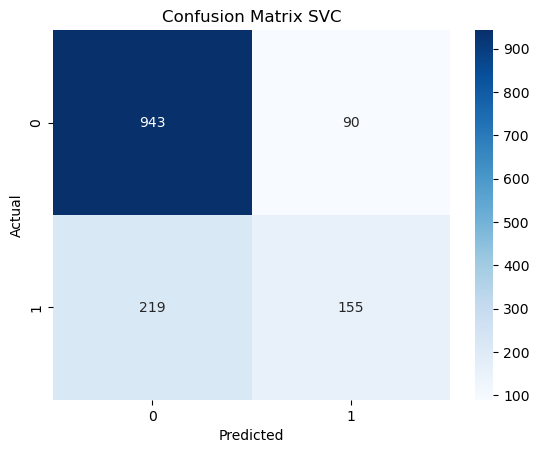

In [89]:
#create a confusion matrix
SVCcm = confusion_matrix(y_test, SCY_pred)

#visualize the confusion matrix
sns.heatmap(SVCcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix SVC")
plt.show()

In [90]:
#Decision Tree Classifier

DTC = DecisionTreeClassifier(random_state = 42)
DTC.fit(x_train, y_train)
DTY_pred = DTC.predict(x_test)
print("DecisionTreeClassifier")
print("Accuracy:",accuracy_score(y_test, DTY_pred))
print("Precision:",precision_score(y_test, DTY_pred))
print("Recall:", recall_score(y_test, DTY_pred))
print("F1-score:",f1_score(y_test, DTY_pred))
print("AUC-ROC:",roc_auc_score(y_test,DTY_pred))

DecisionTreeClassifier
Accuracy: 0.7213930348258707
Precision: 0.47668393782383417
Recall: 0.4919786096256685
F1-score: 0.4842105263157895
AUC-ROC: 0.6482158294982167


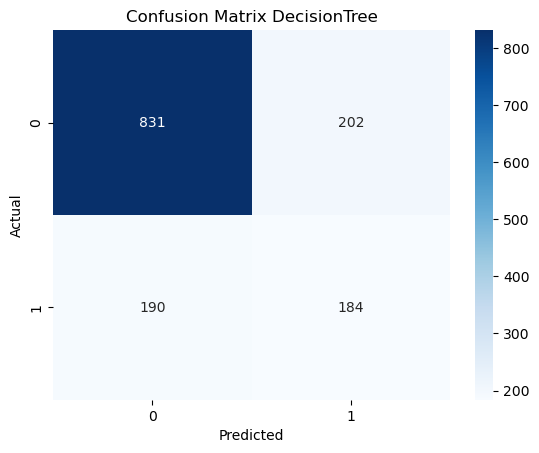

In [91]:
#create a confusion matrix
DTCcm = confusion_matrix(y_test, DTY_pred)

#visualize the confusion matrix
sns.heatmap(DTCcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix DecisionTree")
plt.show()

In [92]:
#GaussianNB 

GNB = GaussianNB()
GNB.fit(x_train, y_train)
GY_pred = GNB.predict(x_test)
print("GaussianNB ")
print("Accuracy:",accuracy_score(y_test, GY_pred))
print("Precision:",precision_score(y_test, GY_pred))
print("Recall:", recall_score(y_test, GY_pred))
print("F1-score:",f1_score(y_test, GY_pred))
print("AUC-ROC:",roc_auc_score(y_test,GY_pred))

GaussianNB 
Accuracy: 0.6837242359630419
Precision: 0.44935805991440797
Recall: 0.8422459893048129
F1-score: 0.5860465116279069
AUC-ROC: 0.7342885319224934


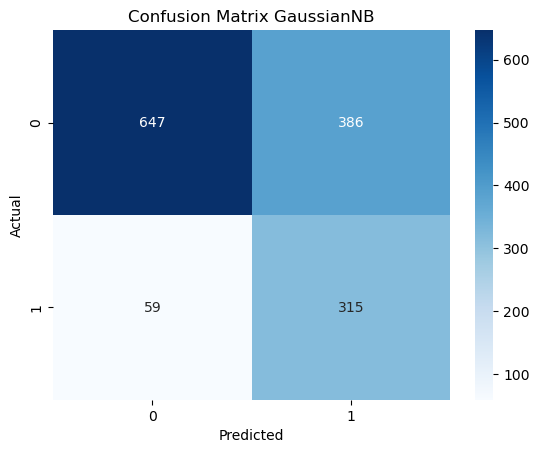

In [93]:
#create a confusion matrix
GNBcm = confusion_matrix(y_test, GY_pred)

#visualize the confusion matrix
sns.heatmap(GNBcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix GaussianNB")
plt.show()

## MACHINE LEARNING MODEL RESULT

### LOGISTIC REGRESSION

1) Accuracy: 0.79%
2) Precision: 0.62%
3) Recall: 0.52%
4) F1-score: 0.56%
5) AUC-ROC: 0.70%

### RandomForestClassifier

1) Accuracy: 0.77%
2) Precision: 0.60%
3) Recall: 0.45%
4) F1-score: 0.52%
5) AUC-ROC: 0.671%

### XGB Classifier

1) Accuracy: 0.76%
2) Precision: 0.57%
3) Recall: 0.49%
4) F1-score: 0.52%
5) AUC-ROC: 0.68%

### GaussianNB 
1) Accuracy: 0.68%
2) Precision: 0.45%
3) Recall: 0.84%
4) F1-score: 0.59%
5) AUC-ROC: 0.73%

### DecisionTreeClassifier
1) Accuracy: 0.72%
2) Precision: 0.48%
3) Recall: 0.49%
4) F1-score: 0.48%
5) AUC-ROC: 0.65%

### SVC
1) Accuracy: 0.78%
2) Precision: 0.63%
3) Recall: 0.41%
4) F1-score: 0.50%
5) AUC-ROC: 0.66%

### SGDClassifier
1) Accuracy: 0.78%
2) Precision: 0.66%
3) Recall: 0.37%
4) F1-score: 0.48%
5) AUC-ROC: 0.65%

### KNeighborsClassifier
1) Accuracy: 0.76%
2) Precision: 0.56%
3) Recall: 0.52%
4) F1-score: 0.54%
5) AUC-ROC: 0.68%



### CONFUSION MATRIX

This is a table needed to evaluate the performance of a binary classification model, by comparing the predicted and actual value
it summarises the perfomance of a machine learning model


TRUE POSITIVE(TP)- This is a value predicted by the model which are actual true,the model predicted churn, and it was positive

TRUE NEGATIVE(TN)- This is a negative value predicted by the machine learning model which  is actually negative, machine learning model predicted no churn, which is truly no

FALSE POSITIVE(FP) - This is a value predicted by the machine learning model which is acually Negative, model predicted churn but actual was no

FALSE NEGATIVE(FN) - This is a critical situation, where the model predicted the no churn, but in the real sense there was churn, this will aid in losig customers and not realising it, and needs to be taken seriously, 
will focus on model that have low true negative

### LOGISTIC REGRESSION

TP- 918 : model predicted 918 churn customers which was true

TN- 194 : Model predicted 194 negative churn customers which was true

FP- 115 : Model predicted 115 customers churn, which didn’t churn

FN- 180 : Model predicted 180 customers wrong,  in this case, the company might be losing 180 customers and don’t know about it.

### RANDOM FOREST
TP- 920 : model predicted 920 churn customers which was actual churn customers

TN- 169 : Model predicted 169 negative churn customers which was true

FP- 113 : Model predicted 113 customers churn, which was false

FN- 205 : Model predicted 205 customers wrong, model predicted 205 customers didn’t churn whereas they did, this is bad for business

### XGB CLASSIFIER
TP- 918: model predicted 918 churn customers which was actual churn

TN- 194: model predicted 194 non churn customers which was actual non churn customer,true

FP- 115: Model predicted 115 customers churn, which was false, they didn’t 

FN- 180: Model predicted 180 customers wrong, model predicted 180 customers didn’t churn whereas they did,

### KNeighbourClassifier
TP- 879: model predicted 879 churn customers which was true

TN- 195: model predicted 195 no-churn customers which true

FP- 155: model predicted 155 churn customers which was false

FN- 179: model predicted 179 not-churn customers which was false

### SGD
TP- 959: model predicted 959 churn which was correct

TN- 142: model predicted 142 non-churn which was true

FP- 74: model predicted 74 churn which was false

FN- 232: model predicted 232 not churn which was false

### SVC
TP- 943: model predicted  943 churn which was true

TN- 155: model predicted 155 not churn which was true

FP- 90: model predicted 90 churn which was false

FN- 219: model predicted 219 not-churn which was false

### DECISION TREE
TP- 831: model predicted 831 churn right

TN- 184: model predicted 184 not-churn right

FP- 202: model predicted 202 churn wrong

FN- 190: model predicted 190 not- churn wrong

### GAUSSIAN NB
TP- 647: model predicted 647 churn right

TN- 315: model predicted 315 non churn right

FP- 386: model predicted 386 churn wrong

FN- 59: model predicted 59 non churn wrong


### CONCLUSION
The best performing model is GaussianNB, having Accuracy: 0.68%,Precision: 0.45%,Recall: 0.84%,F1-score: 0.59%,AUC-ROC: 0.73%, with the least number of false negative values, the model predicted 59 false negative value, the company is likely to lose fewer customers or have lesser non churn wrong, in this case, if the company loses customers because of machine learning model predicting false, it will be lesser compared to any other model which model is likely to predict larger number or non churn, or where the model or algorithm is likely to be wrong, the lesser the number where model is wrong, the lesser the Customers company will lose by model Predicting wrong values.

Also, XGB CLASSIFIER, and LOGISTIC REGRESSION are the second best performing model,
with Accuracy: 0.76%,Precision: 0.57%,Recall: 0.49%,F1-score: 0.52%,AUC-ROC: 0.68%,(XGB CLASSIFIER) and 
Accuracy: 0.79%,Precision: 0.62%,Recall: 0.52%,F1-score: 0.56%,AUC-ROC: 0.70% (LOGISTIC REGRESSION) respectively, and both have 180 False negative(FN) - where the model was wrong and company likely to lose customer,
and 115 False Positive (FP) Respectively

